### Name: **Shibu mohapatra**
### Branch: **MSC AI**
### Roll No: **2**

## Practical No: 1 - Build a CNN Model With PyTorch (MNIST DATASET FOR FASHION RECOGINZER)

https://medium.com/analytics-vidhya/pytorch-for-deep-learning-convolutional-neural-networks-fashion-mnist-f7bff7b4e724

In [ ]:
#importing the libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#datatset
train_set = torchvision.datasets.FashionMNIST(root = '/content/drive/MyDrive/fashion_mnist/',download = True,
                                              train = True, transform = transforms.Compose([transforms.ToTensor(),]))

test_set = torchvision.datasets.FashionMNIST(root = '/content/drive/MyDrive/fashion_mnist/',download=True,
                                             train=False, transform = transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/fashion_mnist/FashionMNIST/raw



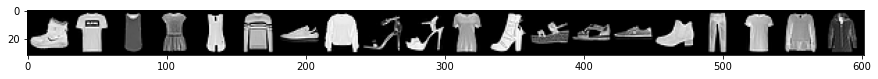

In [ ]:
#data loader
train_loader = torch.utils.data.DataLoader(train_set,batch_size=20)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=60000)
images, labels = next(iter(train_loader))

#used to create a grid of images
grid = torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)),cmap='gray')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super(Network,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
    self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
    self.fc2 = nn.Linear(in_features=120,out_features=60)
    self.fc3 = nn.Linear(in_features=60,out_features=40)
    self.out = nn.Linear(in_features=40,out_features=10)
  def forward(self,x):
    #input layer
    x = x
    #first hidden layer
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x,kernel_size=2,stride=2)
    #second hidden layer
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x,kernel_size=2,stride=2)
    #third hidden layer
    x = x.reshape(-1,12*4*4)
    x = self.fc1(x)
    x = F.relu(x)
    #fourth hidden layer
    x = self.fc2(x)
    x = F.relu(x)
    #fifth hidden layer
    x = self.fc3(x)
    x = F.relu(x)
    #output layer
    x = self.out(x)
    return x

In [ ]:
#defining few parameters
model = Network()
learning_rate = 0.005
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()
epochs = 15

In [ ]:
#training loop
losses = []
for i in range(epochs):
  for j,(images,targets) in enumerate(train_loader):
    
    #making predictions
    y_pred = model(images)
  
    #calculating loss
    loss = criterion(y_pred,targets.reshape(-1))
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if i>10:
    optimizer.lr = 0.0005
  print(loss)
  losses.append(loss)

tensor(2.1258, grad_fn=<NllLossBackward0>)
tensor(0.7982, grad_fn=<NllLossBackward0>)
tensor(0.6222, grad_fn=<NllLossBackward0>)
tensor(0.5560, grad_fn=<NllLossBackward0>)
tensor(0.5004, grad_fn=<NllLossBackward0>)
tensor(0.4667, grad_fn=<NllLossBackward0>)
tensor(0.4404, grad_fn=<NllLossBackward0>)
tensor(0.4153, grad_fn=<NllLossBackward0>)
tensor(0.3842, grad_fn=<NllLossBackward0>)
tensor(0.3475, grad_fn=<NllLossBackward0>)
tensor(0.3275, grad_fn=<NllLossBackward0>)
tensor(0.3041, grad_fn=<NllLossBackward0>)
tensor(0.2881, grad_fn=<NllLossBackward0>)
tensor(0.2690, grad_fn=<NllLossBackward0>)
tensor(0.2529, grad_fn=<NllLossBackward0>)


In [ ]:
#accuracy of the model
x_test,y_test = next(iter(test_loader))
y_pred = (model(x_test).argmax(dim=1))
print("Accuracy is : ",(y_pred.eq(y_test).sum()/10000.).item()*100,"%")

Accuracy is :  86.00000143051147 %


In [ ]:
# plotting loss
# plt.plot(losses)
# plt.xlabel('epochs')
# plt.ylabel('loss')

This is a/an Shirt


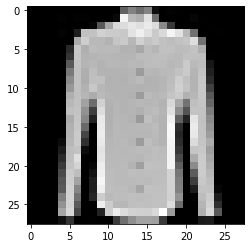

In [ ]:
#random prediction
import random
rand_no = random.randint(0,10000)
order_list = "T-shirt/Top Trouser PullOver Dress Coat Sandal Shirt Sneaker Bag AnkleBoot".split()
plt.imshow(x_test[rand_no].reshape(28,28),cmap='gray')
pred = model(x_test[rand_no].reshape(-1,1,28,28)).argmax()
print("This is a/an {}".format(order_list[pred]))